In [ ]:
import requests
import csv
url = 'https://openapi.twse.com.tw/v1/opendata/t187ap05_L'
data = requests.get(url)
dj = data.json()
with open('股票.csv','w',encoding='utf-8') as f:
    fieldnames = ['公司代號','公司名稱','出表日期','營業收入-上月比較增減(%)','營業收入-上月營收','營業收入-去年同月增減(%)','營業收入-去年當月營收','營業收入-當月營收','產業別','累計營業收入-前期比較增減(%)','累計營業收入-去年累計營收','累計營業收入-當月累計營收','資料年月','備註']
    dict_writer = csv.DictWriter(f,fieldnames=fieldnames)
    dict_writer.writeheader()
    for i in dj:
        dict_writer.writerow(i)





In [ ]:
with open('yahoo ent.txt','wb') as f:
    f.write(html.content)

In [ ]:
import requests
from bs4 import BeautifulSoup
url = 'https://tw.news.yahoo.com/entertainment/?guccounter=1'
html = requests.get(url)
html.encoding = 'utf-8'
sp = BeautifulSoup(html.text,'html.parser')
data = sp.find_all('a',href =  True)
print(type(sp))
print(type(data))
# print(data)
for i in data:
    href = i.get('href')
    text = i.text.strip()
    print(text)
    print(href)



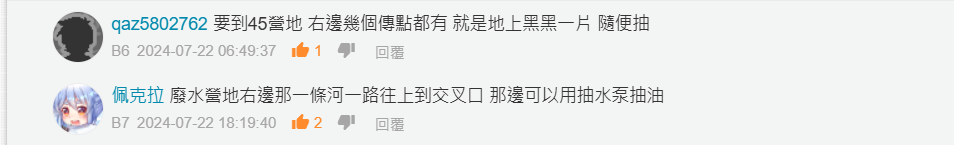

In [4]:
import tkintermapview as tkmap
address = tkintermapview.convert_address_to_coordinates("United Kingdom")


Status code 403 from https://nominatim.openstreetmap.org/search: ERROR - 403 Client Error: Forbidden for url: https://nominatim.openstreetmap.org/search?q=United+Kingdom&format=jsonv2&addressdetails=1&limit=1


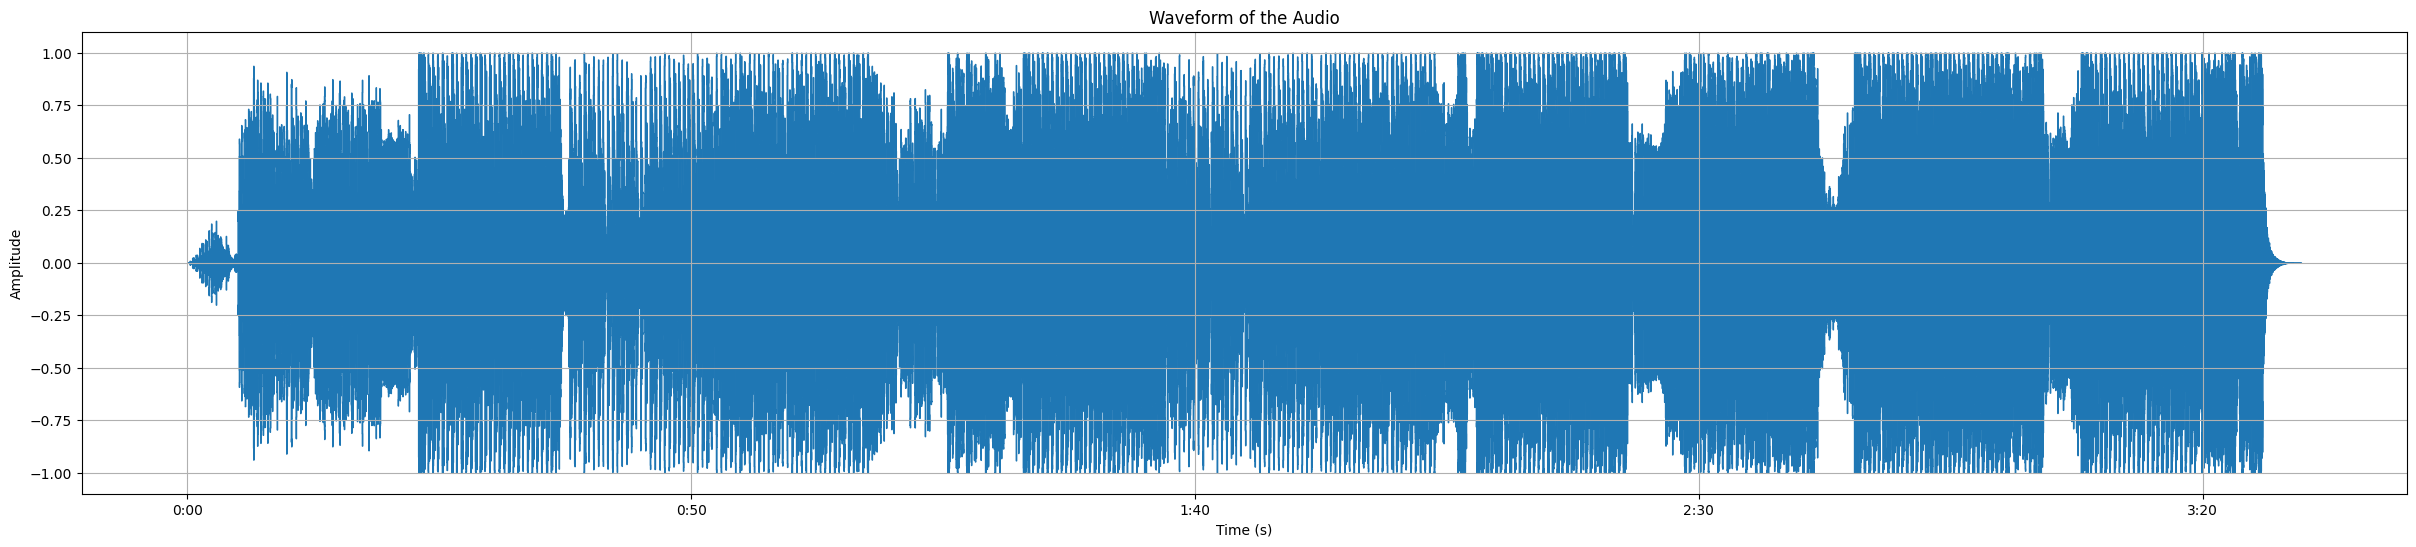

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# 讀取音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"  # 替換為音頻文件的路徑
y, sr = librosa.load(audio_file, sr=None)  # y是波形數據，sr是取樣率

# 創建波形圖
plt.figure(figsize=(30, 6))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform of the Audio')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from IPython.display import display, Audio

# 加載音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"
y, sr = librosa.load(audio_file, sr=None)

# 創建波形圖
def plot_waveform(position=0.0):
    # 當前位置，將其轉換為樣本位置
    sample_position = int(position * len(y))

    # 繪製波形
    plt.figure(figsize=(20, 6))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform of the Audio')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # 在波形上繪製進度條（顯示音樂播放位置）
    plt.axvline(x=position, color='r', linestyle='--', label='Current Playback Position')
    plt.legend()
    plt.grid(True)

    # 顯示圖形
    plt.show()

    # 播放音樂（播放音樂從當前位置開始）
    display(Audio(y[sample_position:], rate=sr))

# 創建交互式滑塊
slider = FloatSlider(
    value=0.0,  # 初始值
    min=0.0,    # 最小值
    max=1.0,    # 最大值，1代表音樂結束
    step=0.01,  # 每次變化的步長
    description='Position:',
    continuous_update=False  # 用戶滑動時才更新
)

# 顯示交互式控制
interact(plot_waveform, position=slider)


In [2]:
import tkinter as tk
from tkinter import ttk
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from IPython.display import display, Audio
from ipywidgets import FloatSlider

# 加載音樂文件
audio_file = r"C:\Users\user\Downloads\八三夭831【致青春 Young Guns】Official Music Video.wav"
y, sr = librosa.load(audio_file, sr=None)

class AudioPlayerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Audio Player with Waveform")
        self.root.geometry("800x600")

        # 創建主框架
        self.main_frame = ttk.Frame(self.root)
        self.main_frame.pack(fill=tk.BOTH, expand=True)

        # 創建播放位置滑塊
        self.slider = FloatSlider(
            value=0.0,  # 初始值
            min=0.0,    # 最小值
            max=1.0,    # 最大值，1代表音樂結束
            step=0.01,  # 每次變化的步長
            description='Position:',
            continuous_update=False  # 用戶滑動時才更新
        )
        self.slider.observe(self.update_position, names='value')

        # 顯示波形
        self.figure = plt.Figure(figsize=(10, 6), dpi=100)
        self.ax = self.figure.add_subplot(111)
        self.canvas = FigureCanvasTkAgg(self.figure, master=self.main_frame)
        self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
        # 播放音樂的更新
        self.update_waveform()

    def update_waveform(self):
        # 當前位置，將其轉換為樣本位置
        position = self.slider.value
        sample_position = int(position * len(y))

        # 清除上一個波形
        self.ax.clear()

        # 繪製波形
        librosa.display.waveshow(y, sr=sr, ax=self.ax)
        self.ax.set_title('Waveform of the Audio')
        self.ax.set_xlabel('Time (s)')
        self.ax.set_ylabel('Amplitude')

        # 在波形上繪製進度條（顯示音樂播放位置）
        self.ax.axvline(x=position, color='r', linestyle='--', label='Current Playback Position')
        self.ax.legend()
        self.ax.grid(True)

        # 更新顯示
        self.canvas.draw()

    def update_position(self, change):
        # 更新播放位置並重新顯示波形
        self.update_waveform()
        
        # 播放音樂（播放音樂從當前位置開始）
        sample_position = int(change['new'] * len(y))
        display(Audio(y[sample_position:], rate=sr))

# 創建主應用窗口
root = tk.Tk()
app = AudioPlayerApp(root)

# 啟動應用
root.mainloop()


In [4]:
import tkinter as tk
from tkinter import filedialog
from pydub import AudioSegment
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class AudioPlayerApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Audio Player with Drag and Drop")

        # 設置音檔和時間軸
        self.audio = None
        self.playhead_pos = 0
        self.timeframe_start = 0
        self.timeframe_end = 800  # 時間軸的寬度代表音樂的總時長

        # 設置 Canvas 並放置波形圖和播放進度條
        self.canvas = tk.Canvas(self.root, width=800, height=200)
        self.canvas.pack()

        self.playhead = self.canvas.create_line(self.playhead_pos, 100, self.playhead_pos, 150, width=2, fill="red")
        
        # 加載音檔的按鈕
        self.load_button = tk.Button(self.root, text="Load Audio", command=self.load_audio)
        self.load_button.pack()

        # 可拖動的拼圖按鈕
        self.button = tk.Button(self.root, text="Puzzle", command=self.execute_function)
        self.button_id = self.canvas.create_window(100, 50, window=self.button)

        # 綁定拖動事件
        self.canvas.tag_bind(self.button_id, '<ButtonPress-1>', self.on_button_press)
        self.canvas.tag_bind(self.button_id, '<B1-Motion>', self.on_button_drag)
        self.canvas.tag_bind(self.button_id, '<ButtonRelease-1>', self.on_button_release)

        self.start_x = None
        self.start_y = None
        self.button_position = 100  # 按鈕的初始位置

        # 播放音頻並更新進度
        self.update_playhead()

    def load_audio(self):
        # 打開檔案選擇器並選擇音檔
        file_path = filedialog.askopenfilename(filetypes=[("Audio Files", "*.mp3;*.wav")])
        
        if file_path:
            self.audio = AudioSegment.from_file(file_path)
            self.plot_waveform()

    def plot_waveform(self):
        if not self.audio:
            return
        
        # 計算音頻波形
        samples = np.array(self.audio.get_array_of_samples())
        sample_rate = self.audio.frame_rate
        time = np.arange(len(samples)) / sample_rate

        # 顯示波形圖
        fig, ax = plt.subplots(figsize=(10, 4))
        ax.plot(time, samples)
        ax.set_title("Audio Waveform")
        ax.set_xlabel("Time (s)")
        ax.set_ylabel("Amplitude")
        
        # 清除舊的波形並繪製新波形
        if hasattr(self, 'waveform_canvas'):
            self.waveform_canvas.get_tk_widget().destroy()

        self.waveform_canvas = FigureCanvasTkAgg(fig, self.canvas)
        self.waveform_canvas.get_tk_widget().pack()

        # 顯示時間軸
        self.plot_timeframe(time)

    def plot_timeframe(self, time):
        # 顯示時間軸
        fig, ax = plt.subplots(figsize=(10, 1))
        ax.plot(time, np.zeros_like(time), color="black")
        ax.set_xlim(0, time[-1])
        ax.set_yticks([])
        ax.set_xticks(np.arange(0, time[-1], step=1))
        
        if hasattr(self, 'timeframe_canvas'):
            self.timeframe_canvas.get_tk_widget().destroy()

        self.timeframe_canvas = FigureCanvasTkAgg(fig, self.canvas)
        self.timeframe_canvas.get_tk_widget().pack()

    def on_button_press(self, event):
        # 記錄拖動開始的位置
        self.start_x = event.x
        self.start_y = event.y

    def on_button_drag(self, event):
        # 計算按鈕移動的偏移量並移動按鈕
        dx = event.x - self.start_x
        self.canvas.move(self.button_id, dx, 0)
        self.start_x = event.x

        # 更新按鈕在時間軸上的位置
        self.button_position += dx

    def on_button_release(self, event):
        # 當按鈕放開時，輸出當前位置
        print(f"Button dropped at {self.button_position} on the timeframe.")

    def update_playhead(self):
        if not self.audio:
            return
        
        # 模擬播放進度條
        self.playhead_pos += 1  # 模擬播放進度
        if self.playhead_pos > self.timeframe_end:
            self.playhead_pos = self.timeframe_end

        # 更新播放進度條的位置
        self.canvas.coords(self.playhead, self.playhead_pos, 100, self.playhead_pos, 150)

        # 檢查播放進度條是否到達拼圖的邊界
        if self.playhead_pos >= self.button_position and self.playhead_pos < self.button_position + 50:
            self.execute_function()

        # 繼續更新進度
        self.root.after(100, self.update_playhead)

    def execute_function(self):
        # 當播放進度條到達拼圖時，執行功能
        print("Puzzle function triggered!")

if __name__ == "__main__":
    root = tk.Tk()
    app = AudioPlayerApp(root)
    root.mainloop()


c:\Users\user\miniconda3\envs\venv\Lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
import pygame

# 初始化 Pygame
pygame.init()

# 設定螢幕尺寸
screen = pygame.display.set_mode((800, 600))

# 設定顏色
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# 設定初始位置
x = 50
y = 50
speed = 2

# 設定遊戲運行標誌
running = True

# 遊戲循環
while running:
    # 事件處理
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

    # 移動矩形
    keys = pygame.key.get_pressed()
    if keys[pygame.K_LEFT]:
        x -= speed
    if keys[pygame.K_RIGHT]:
        x += speed
    if keys[pygame.K_UP]:
        y -= speed
    if keys[pygame.K_DOWN]:
        y += speed

    # 填充背景
    screen.fill(WHITE)

    # 畫出矩形
    pygame.draw.rect(screen, RED, (x, y, 50, 50))

    # 更新螢幕
    pygame.display.update()

# 退出遊戲
pygame.quit()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load the Excel file
file_path = r"c:\Users\user\Desktop\AI\全台縣市電車登記數量.xlsx"  # Replace with your actual file path
data = pd.read_excel(file_path)

# Ensure the necessary columns are present
if "總登記數" in data.columns and "現有車站數" in data.columns:
    # 原始基準車站比
    base_ratio = 740
    base_total = 7206  # 假設基準數值（內湖區）

    # 計算調整後基準比例並生成目標變數
    data["調整後基準比例"] = (base_ratio / base_total) * data["總登記數"]
    data["理想車站數"] = data["總登記數"] / data["調整後基準比例"]
    data["目標"] = data["現有車站數"] - data["理想車站數"]
    data["目標"] = data["目標"].apply(lambda x: 1 if x < 0 else 0)  # 1 表示新增，0 表示減少

    # 準備特徵和目標變數
    X = data[["總登記數", "現有車站數"]]
    y = data["目標"]

    # 分割訓練集和測試集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 訓練邏輯回歸模型
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # 預測與評估
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, target_names=["減少", "新增"])

    # 提供係數與模型解釋
    coefficients = pd.DataFrame({
        "特徵": X.columns,
        "係數": model.coef_[0]
    })

    # Save the updated data with predictions to a new Excel file
    output_file_path = r"C:\Users\user\Desktop\sqlupdated_excel_file.xlsx"  # Replace with your desired file path
    data.to_excel(output_file_path, index=False, encoding="utf-8-sig")

    print("邏輯回歸分析完成！")
    print("分類報告：")
    print(report)
    print("模型係數：")
    print(coefficients)
    print(f"結果已保存至 {output_file_path}")



In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# 讀取資料
file_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄.xlsx'
data = pd.read_excel(file_path)

# 添加分類目標列 (1: 需要增設站點, 0: 不需要增設站點)
threshold = 740  # 比例閾值
data['需要增設'] = (data['數值'] / threshold).apply(lambda x: 1 if x >= 1 else 0)

# 定義特徵與目標
X = data[['數值']]  # 特徵：數值
y = data['需要增設']  # 目標：是否需要增設

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測並評估模型
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("模型評估報告：")
print(report)

# 為原始資料添加預測結果
data['預測結果'] = model.predict(X_scaled)

# 將更新後的資料保存到新檔案
output_file = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_預測結果.xlsx'
data.to_excel(output_file, index=False)
print(f"結果已保存到 {output_file}")


模型評估報告：
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.69      0.82        36

    accuracy                           0.85        74
   macro avg       0.89      0.85      0.85        74
weighted avg       0.88      0.85      0.85        74

結果已保存到 C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_預測結果.xlsx


模型評估報告：
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.69      0.82        36

    accuracy                           0.85        74
   macro avg       0.89      0.85      0.85        74
weighted avg       0.88      0.85      0.85        74



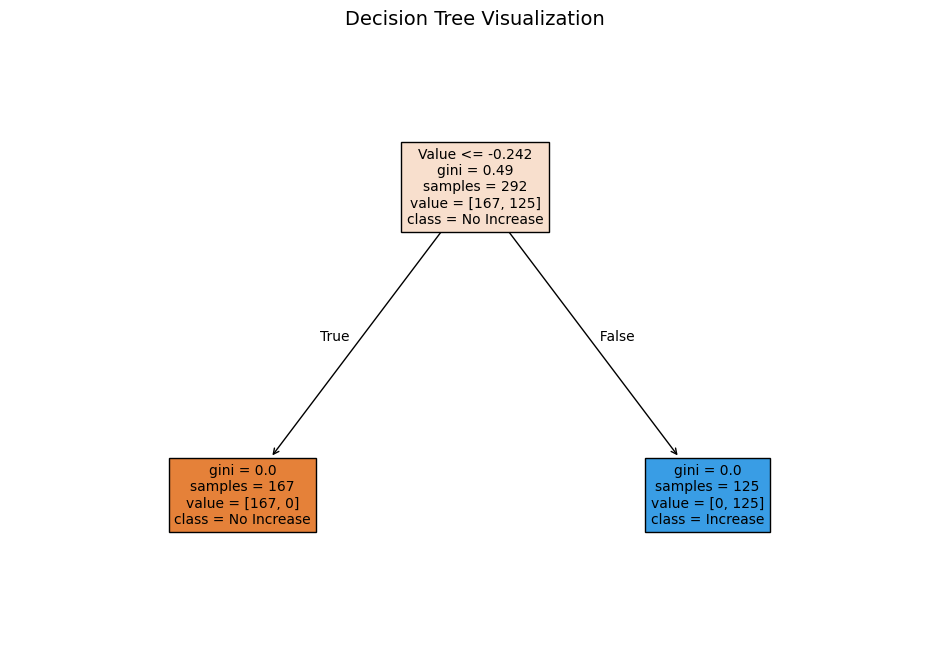

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

# 讀取資料
file_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄.xlsx'  # 確保這個路徑是正確的
data = pd.read_excel(file_path)

# 添加分類目標列 (1: 需要增設站點, 0: 不需要增設站點)
threshold = 740  # 比例閾值
data['需要增設'] = (data['數值'] / threshold).apply(lambda x: 1 if x >= 1 else 0)

# 定義特徵與目標
X = data[['數值']]  # 特徵：數值
y = data['需要增設']  # 目標：是否需要增設

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測並評估模型
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("模型評估報告：")
print(report)

# 為原始資料添加預測結果
data['預測結果'] = model.predict(X_scaled)

# 保存更新後的資料
# output_file = '/mnt/data/單欄_預測結果.xlsx'
# data.to_excel(output_file, index=False)
# print(f"結果已保存到 {output_file}")

# 使用決策樹模型來輔助視覺化
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

# 繪製決策樹，使用英文名稱
plt.figure(figsize=(12, 8))
tree.plot_tree(
    decision_tree,
    feature_names=['Value'],  # 數值 -> Value
    class_names=['No Increase', 'Increase'],  # 不需要增設 -> No Increase, 需要增設 -> Increase
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


模型評估報告：
              precision    recall  f1-score   support

           0       0.78      1.00      0.87        38
           1       1.00      0.69      0.82        36

    accuracy                           0.85        74
   macro avg       0.89      0.85      0.85        74
weighted avg       0.88      0.85      0.85        74

結果已保存到 C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_站點調整建議.xlsx


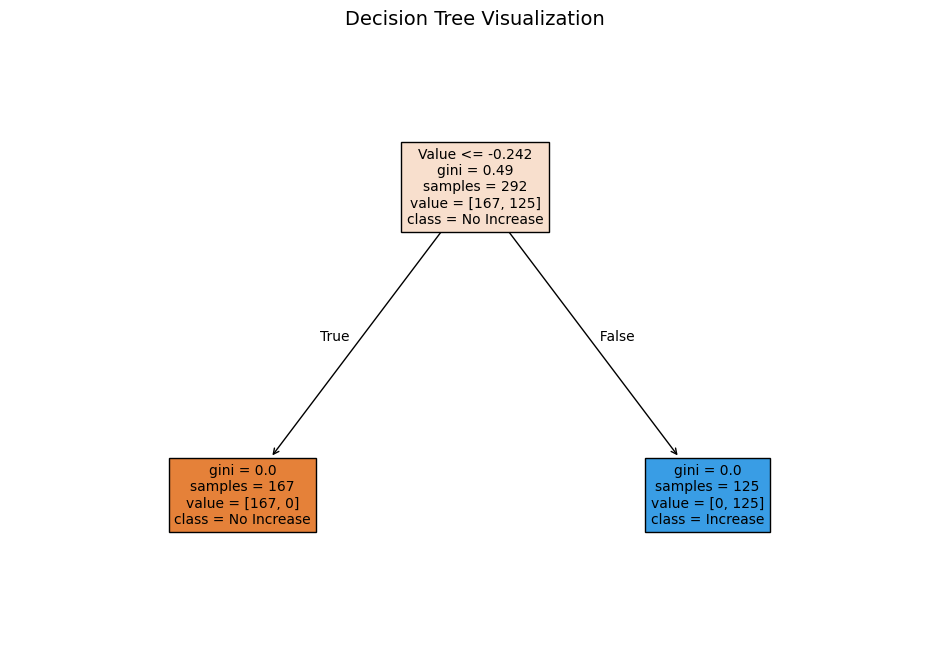

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

# 讀取資料
file_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄.xlsx'  # 確保這個路徑是正確的
data = pd.read_excel(file_path)

# 添加分類目標列 (1: 需要增設站點, 0: 不需要增設站點)
threshold = 740  # 比例閾值
data['需要增設'] = (data['數值'] / threshold).apply(lambda x: 1 if x >= 1 else 0)

# 定義特徵與目標
X = data[['數值']]  # 特徵：數值
y = data['需要增設']  # 目標：是否需要增設

# 標準化數據
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 分割訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 訓練邏輯回歸模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 預測並評估模型
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print("模型評估報告：")
print(report)

# 為原始資料添加預測結果
data['預測結果'] = model.predict(X_scaled)

# 計算應有站點數
data['應有站點數'] = (data['數值'] / threshold).apply(np.ceil)  # 向上取整
data['目前站點數'] = 10  # 假設每個區域目前都有 10 個站點（可替換為真實數據）

# 計算需要增設或刪減的站點數
data['站點差距'] = data['應有站點數'] - data['目前站點數']

# 添加操作建議
def operation(row):
    if row['站點差距'] > 0:
        return f"新增 {int(row['站點差距'])} 個站點"
    elif row['站點差距'] < 0:
        return f"刪減 {abs(int(row['站點差距']))} 個站點"
    else:
        return "不需改變"

data['操作建議'] = data.apply(operation, axis=1)

# 保存更新後的資料
output_file = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄_站點調整建議.xlsx'
data.to_excel(output_file, index=False)
print(f"結果已保存到 {output_file}")

# 繪製決策樹，使用英文名稱
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
tree.plot_tree(
    decision_tree,
    feature_names=['Value'],  # 數值 -> Value
    class_names=['No Increase', 'Increase'],  # 不需要增設 -> No Increase, 需要增設 -> Increase
    filled=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


In [1]:
import pandas as pd
import numpy as np

# 讀取資料
file_path_motorbikes = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\單欄.xlsx'
file_path_stations = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\行政區站點數.xlsx'

motorbike_data = pd.read_excel(file_path_motorbikes)
station_data = pd.read_excel(file_path_stations)

# 合併數據：根據縣市與行政區匹配
motorbike_data['行政區'] = motorbike_data['項目'].str.split('_').str[1]
motorbike_data['縣市'] = motorbike_data['項目'].str.split('_').str[0]
motorbike_data = motorbike_data[['縣市', '行政區', '數值']].rename(columns={'數值': '電動機車總數'})

merged_data = pd.merge(station_data, motorbike_data, on=['縣市', '行政區'], how='inner')

# 設定閾值
threshold = 740

# 計算應有站點數與差距
merged_data['應有站點數'] = (merged_data['電動機車總數'] / threshold).apply(np.ceil)  # 向上取整
merged_data['站點差距'] = merged_data['應有站點數'] - merged_data['小計']

# 根據差距計算操作建議
merged_data['操作建議'] = merged_data['站點差距'].apply(
    lambda x: f"新增 {int(np.ceil(x))} 個站點" if x > 0 else (f"刪減 {abs(int(np.floor(x)))} 個站點" if x < 0 else "不需改變")
)

# 將結果保存為新 Excel 文件
output_file_path = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\站點增減預測結果.xlsx'
merged_data.to_excel(output_file_path, index=False)

print(f"結果已保存至：{output_file_path}")


結果已保存至：C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\站點增減預測結果.xlsx


模型準確度：0.9743589743589743
分類報告：
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.33      0.50         3

    accuracy                           0.97        78
   macro avg       0.99      0.67      0.74        78
weighted avg       0.98      0.97      0.97        78



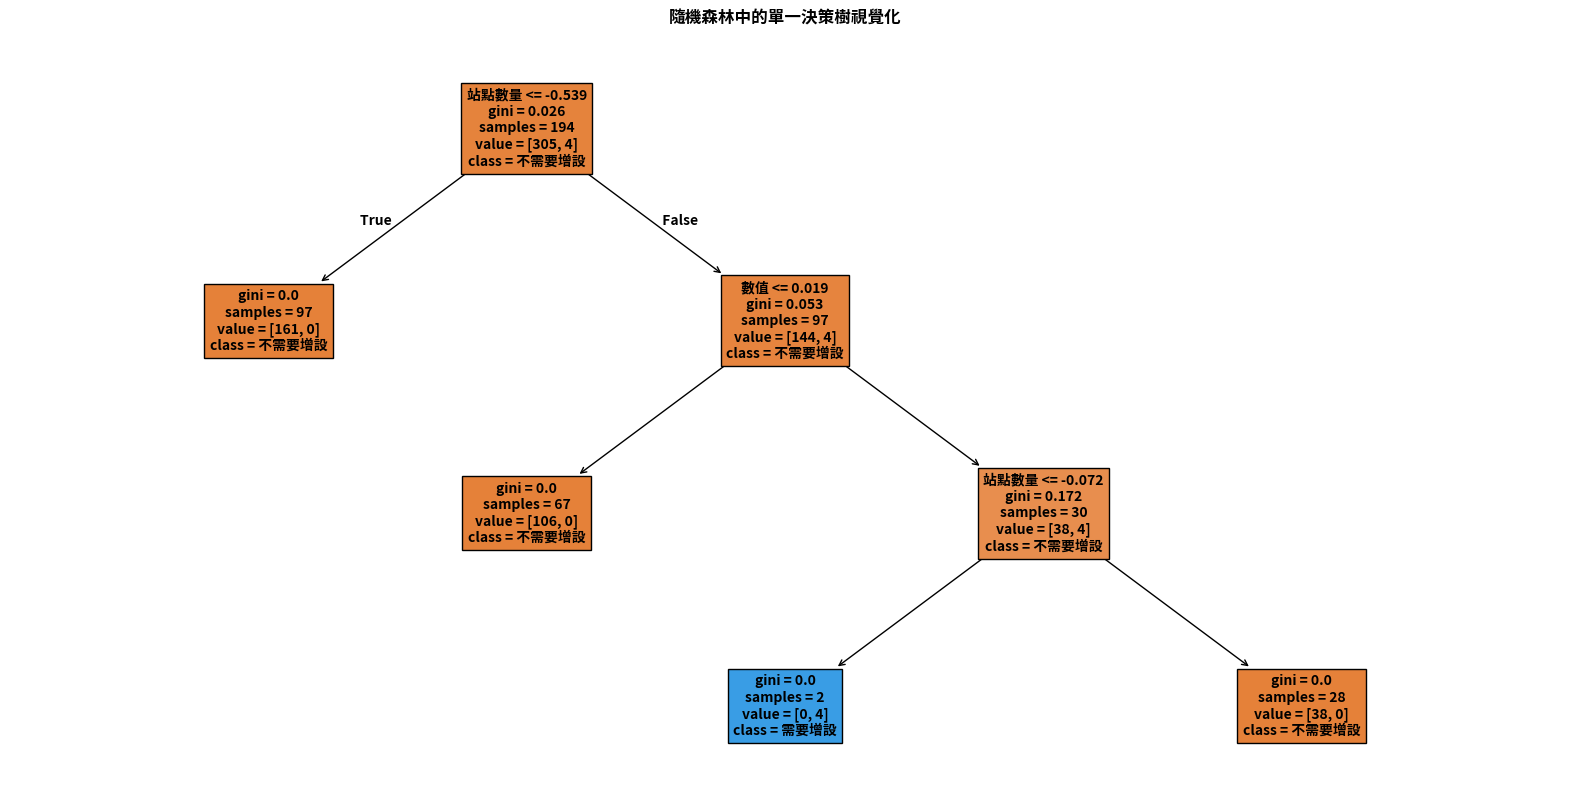

|--- 站點數量 <= -0.54
|   |--- class: 0.0
|--- 站點數量 >  -0.54
|   |--- 數值 <= 0.02
|   |   |--- class: 0.0
|   |--- 數值 >  0.02
|   |   |--- 站點數量 <= -0.07
|   |   |   |--- class: 1.0
|   |   |--- 站點數量 >  -0.07
|   |   |   |--- class: 0.0



In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 設置支持中文字體
plt.rcParams['font.sans-serif'] = ['Taipei Sans TC Beta']  # 替換為系統支持的中文字體
plt.rcParams['axes.unicode_minus'] = False

# Load the datasets
file_path_vehicle = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\全台縣市電車登記數量utf8.csv'
file_path_station = r'C:\Users\ASUS\Desktop\GItHub\TVDI_python\testing\AI\城市與行政區站點統計utf8.csv'

electric_vehicle_data = pd.read_csv(file_path_vehicle)
station_data = pd.read_csv(file_path_station)

# Rename columns for clarity
electric_vehicle_data.columns = ['項目', '數值', '行政區']
station_data.columns = ['縣市', '行政區', '地址', '站點數量']

# Sum station counts for each administrative area
station_totals = station_data.groupby(['縣市', '行政區'])['站點數量'].sum().reset_index()

# Merge the datasets
merged_data = pd.merge(
    electric_vehicle_data[['數值', '行政區']],
    station_totals,
    on='行政區',
    how='left'
)

# Calculate necessary station count and the gap
threshold = 740
merged_data['應有站點數'] = np.ceil(merged_data['數值'] / threshold)
merged_data['站點差距'] = merged_data['應有站點數'] - merged_data['站點數量']
merged_data['需要增設'] = (merged_data['站點差距'] > 0).astype(int)

# Define features and target variable
X = merged_data[['數值', '站點數量']]
y = merged_data['需要增設']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"模型準確度：{accuracy}")
print("分類報告：\n", report)

# Add predictions back to the dataset
merged_data['預測結果'] = rf_classifier.predict(X_scaled)

# Save the results
# output_file = "站點增減預測結果.csv"
# merged_data.to_csv(output_file, index=False)
# print(f"結果已保存到 {output_file}")

# Visualize one of the decision trees from the random forest
plt.figure(figsize=(20, 10))
single_tree = rf_classifier.estimators_[0]  # Extract one tree
plot_tree(
    single_tree,
    feature_names=['數值', '站點數量'],
    class_names=['不需要增設', '需要增設'],
    filled=True,
    fontsize=10
)
plt.title("隨機森林中的單一決策樹視覺化")
plt.show()

# Optionally, print the text representation of the decision tree
tree_text = export_text(single_tree, feature_names=['數值', '站點數量'])
print(tree_text)
